In [13]:
import pandas as pd
import numpy as np
import cv2
import os
import imageio
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

%matplotlib inline

In [14]:
convSize = [80, 80]
nClusters = 100

all_paths = ['./characters_01_NEW/', './characters_02_NEW/', './characters_03_NEW/', './characters_04_NEW/', './characters_05_NEW/']

images = []
for data_path in all_paths:
    # path to sorted data
    # data_path = './characters_01_NEW/'

    files = [data_path + x for x in os.listdir(data_path)]

    #images = []
    for file in files:
        img = cv2.imread(file)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, (convSize[0], convSize[1]))
        img = img.reshape(convSize[0] * convSize[1])
        images.append(img) 

original = np.array(images.copy())
    
scaler = StandardScaler()

scaler.fit(images)
images = scaler.transform(images)

In [15]:
pca = PCA(n_components=25)
pca.fit(images)
pca_img = pca.transform(images)

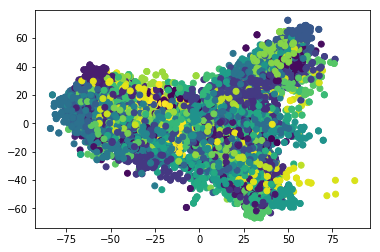

In [16]:
kmeans = KMeans(n_clusters=nClusters, random_state=0).fit(pca_img)
plt.scatter(pca_img[:, 0], pca_img[:, 1], c=kmeans.labels_)

plt.show()

In [17]:
# Create folders
n = 0
for i in range(kmeans.labels_.max()):
    
    save_path = '{}/{}'.format('./testing', i)
    
    if not os.path.isdir(save_path):
        os.mkdir(save_path)
    
    tmp = original[kmeans.labels_ == kmeans.labels_[i]]
    
    for j in range(np.shape(tmp)[0]):
        tmpImg = np.reshape(tmp[j], convSize).astype(np.uint8)
        imageio.imwrite('{}/{}/{}.jpg'.format('./testing', i, n), tmpImg)
        n += 1